### Power Transformation

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, accuracy_score
%matplotlib inline

In [2]:
# reading data
data =pd.read_csv('/Users/vrunda/Library/CloudStorage/GoogleDrive-shahvrunda231296@gmail.com/My Drive/Datasets/concrete_data.csv')
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
data.shape

(1030, 9)

In [4]:
data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [5]:
data.describe().T 
# we do have few columns like Blast Furnance Slag , Fly Ash and Superplasticizer have min of 0, so we would need to handle them, if we want to apply box cox

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnace Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [6]:
x= data.drop(columns='Strength') # independent variables 
y= data.iloc[:, -1] # dependent variables

In [7]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state= 42)

In [8]:
# Before transformation 

lr= LinearRegression()
lr.fit(x_train, y_train)
y_predit= lr.predict(x_test)
r2_score(y_test, y_predit) # linear regression model explains about 63% of the variance in the target variable.

# We dont say our model is performing well or bad based on one time calculation, as we have one random state, we should use cross-validation score. 

0.627553179231485

In [9]:
# using cross validation 
lr= LinearRegression()
np.mean(cross_val_score(lr,x,y,scoring='r2')) # by default cv=5

# on 5- fold cross validation, we can see our model actually explains about 46% of the variance in the target variable. 

np.float64(0.46099404916628617)

In [10]:
# Applying box-cox transformation 

pt= PowerTransformer(method='box-cox') # default is yeo-johnson, standardize is True , ie.: mean= 0 and std = 1

x_train_transform= pt.fit_transform(x_train + 0.000001) # shifting to handle zeros. 
x_test_transform= pt.transform(x_test + 0.000001)

# lets check what values of lambda did we get for columns 
pd.DataFrame({'cols': x_train.columns, 'box-cox-lambda': pt.lambdas_}) # lambda will be in [-5,5]

,cols,box-cox-lambda
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


In [11]:
lr= LinearRegression()
lr.fit(x_train_transform, y_train)
y_predit= lr.predict(x_test_transform)
r2_score(y_test, y_predit) 

0.8047824994911178

In [12]:
pt= PowerTransformer(method='box-cox')
x_transform= pt.fit_transform(x + 0.000001)

np.mean(cross_val_score(lr,x_transform,y,scoring='r2')) # as we can see it went from 46% to 66.6%. 

np.float64(0.6662950326286244)

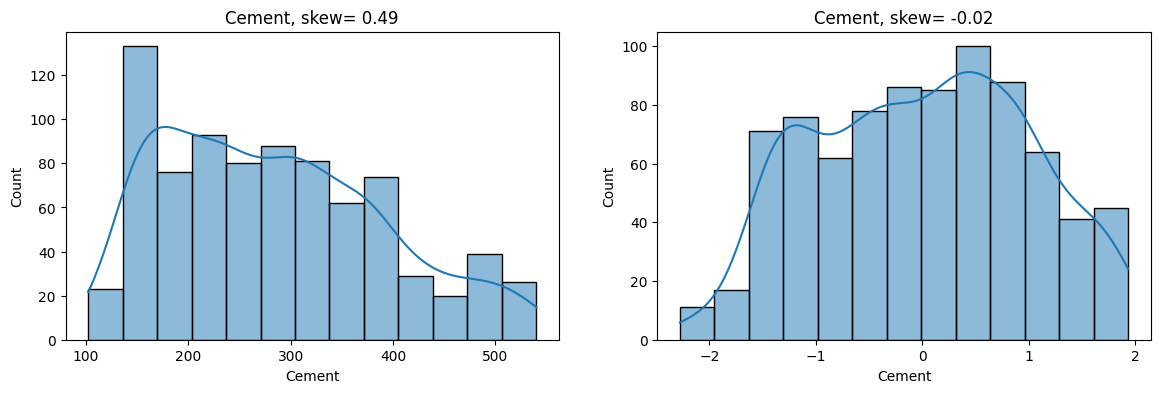

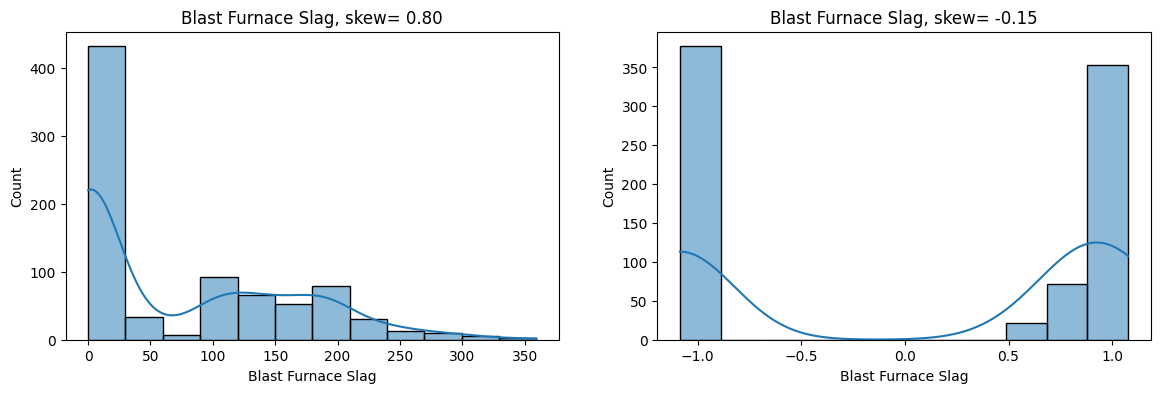

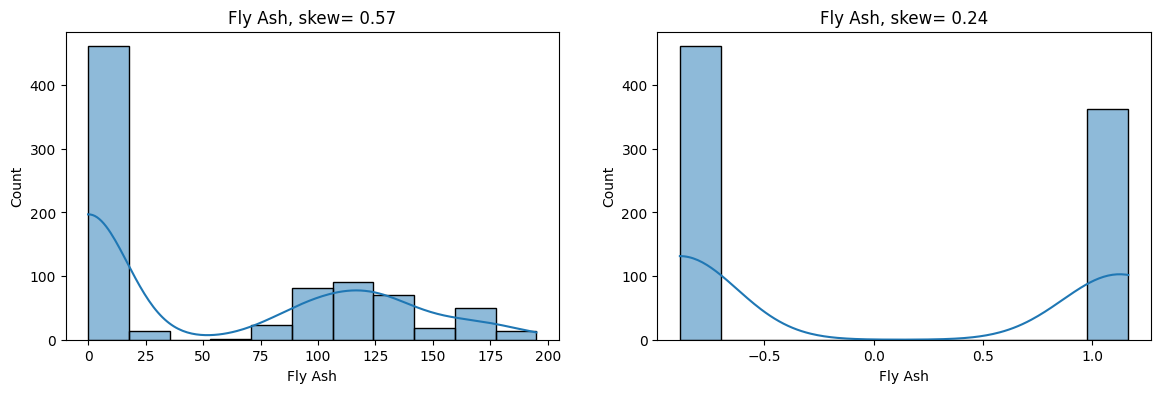

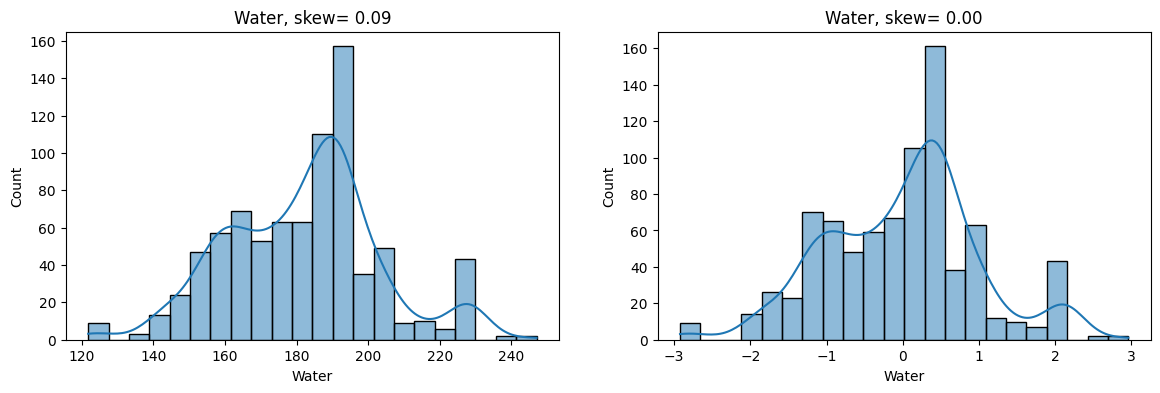

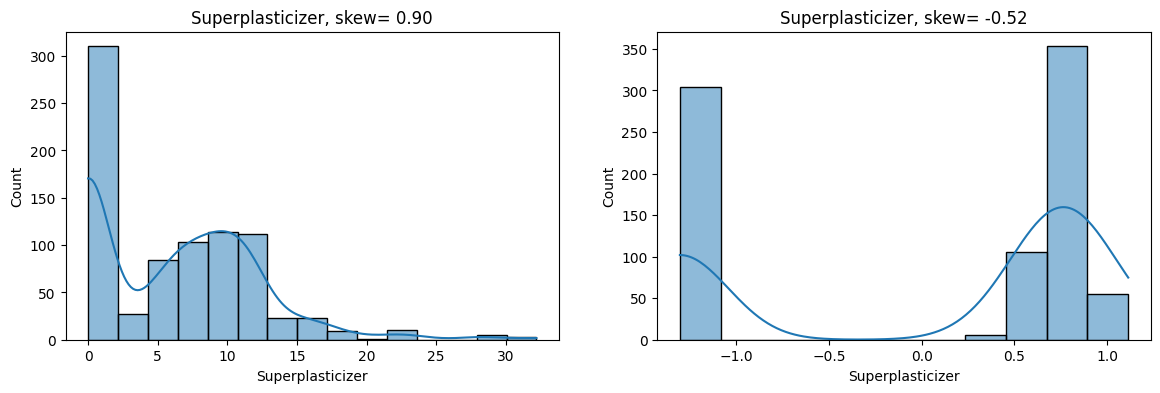

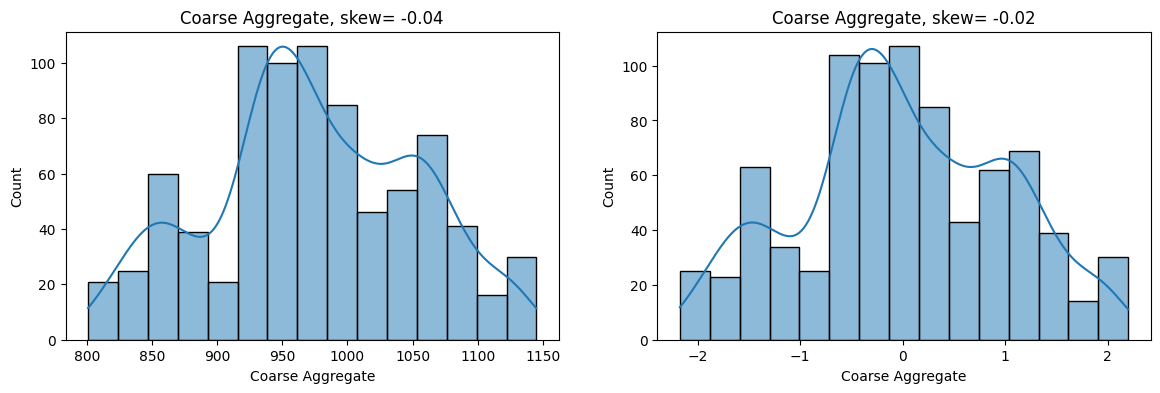

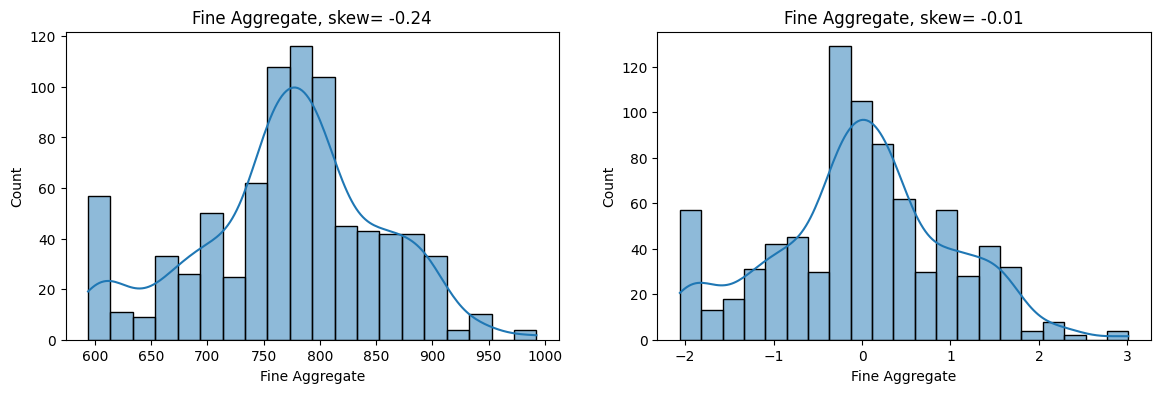

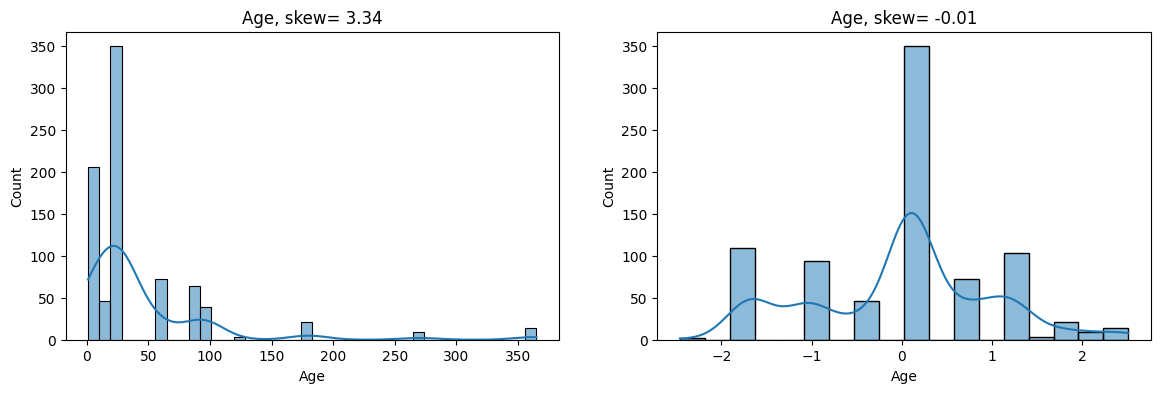

In [27]:
x_train_transform = pd.DataFrame(x_train_transform, columns= x_train.columns)

for col in x_train_transform.columns: 
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(x_train[col], kde= True)
    plt.title(f"{col}, skew= {x_train[col].skew():.2f}")

    plt.subplot(122)
    sns.histplot(x_train_transform[col], kde= True)
    plt.title(f"{col}, skew= {x_train_transform[col].skew():.2f}")

    plt.show()

### Yeo-Johnson

In [39]:
# Applying yeo-johnson transformation 

pt= PowerTransformer() # default is yeo-johnson, standardize is True , ie.: mean= 0 and std = 1

x_train_transform2= pt.fit_transform(x_train) # no need for handling the shift 
x_test_transform2= pt.transform(x_test)

# lets check what values of lambda did we get for columns 
pd.DataFrame({'cols': x_train.columns, 'yeo-johnson': pt.lambdas_}) # lambda will be in [-5,5]

lr= LinearRegression()

lr.fit(x_train_transform2, y_train)
y_predict= lr.predict(x_test_transform2)

r2_score(y_test, y_predit) 


0.8047824994911178

In [40]:
# Lets check with cross-validation 

lr= LinearRegression()
x_transform2= pt.fit_transform(x)

np.mean(cross_val_score(lr, x_transform2, y, scoring='r2')) 

# Thus without transformation 46% 
# With box-cox 66%
# with yeo-johnson 68%

np.float64(0.6834625131622577)

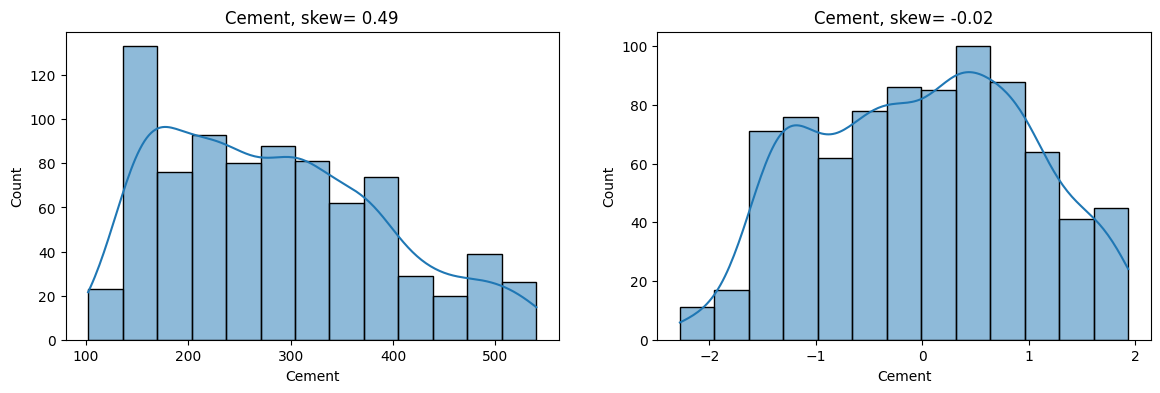

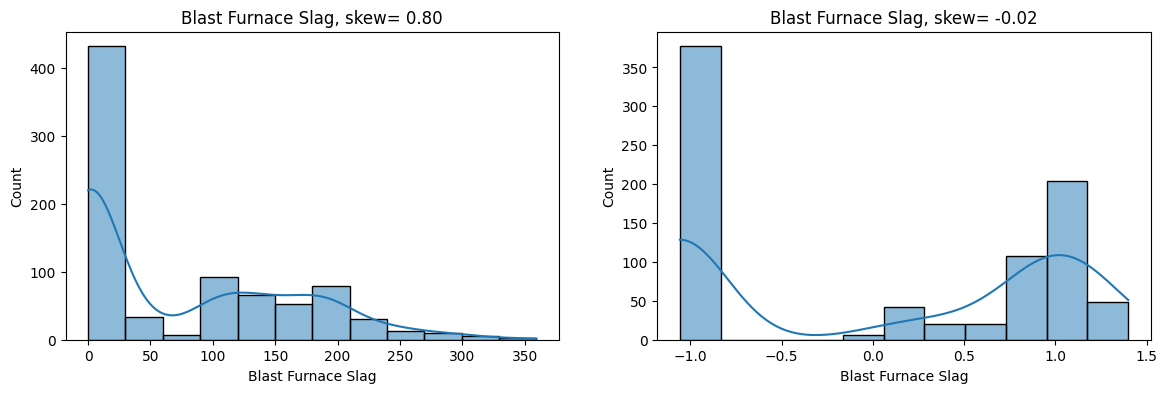

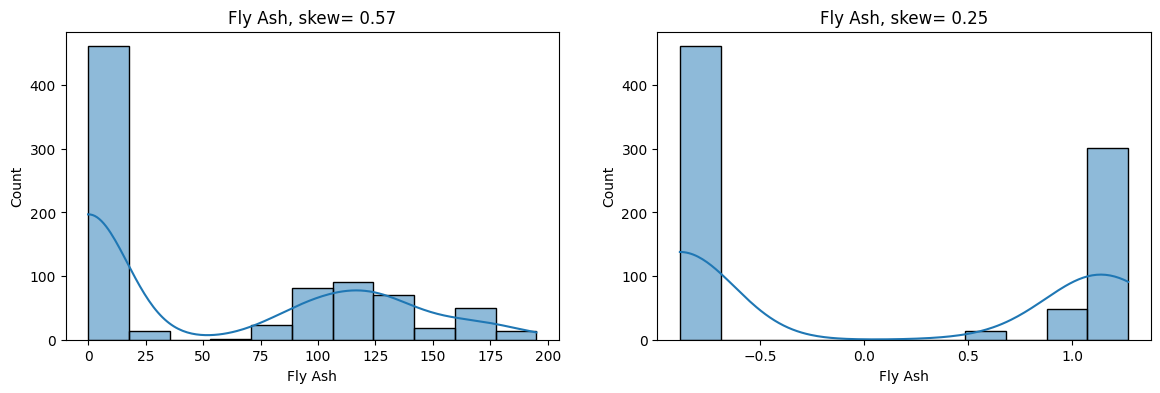

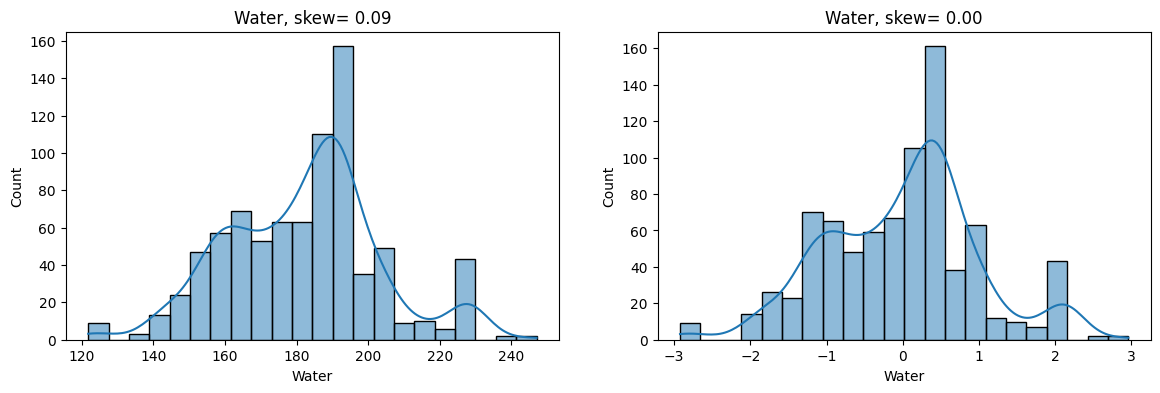

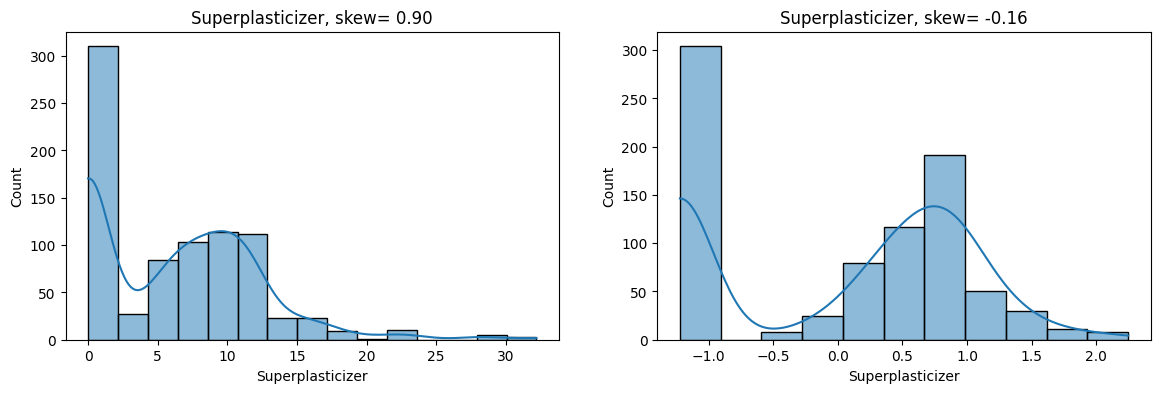

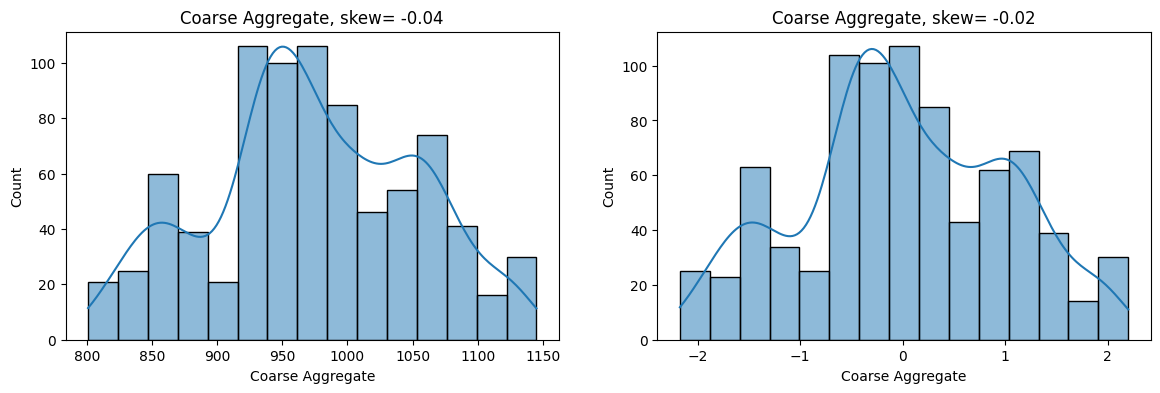

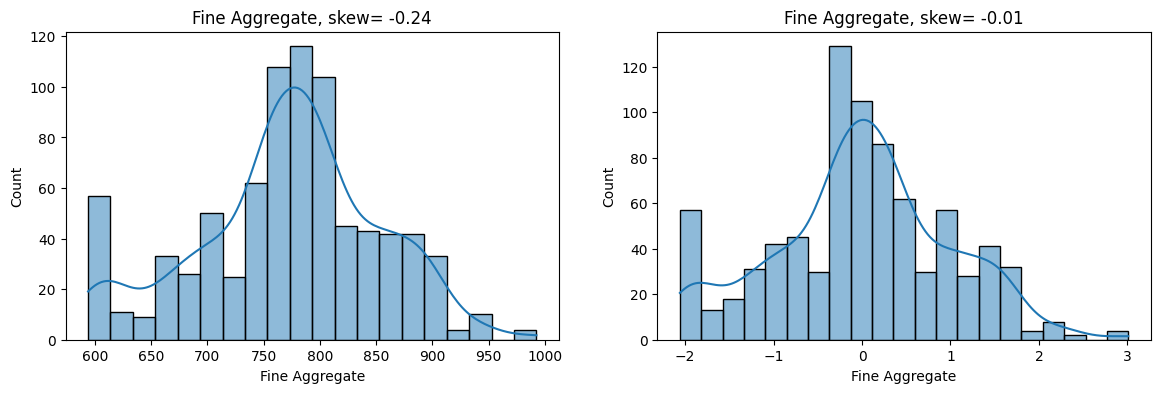

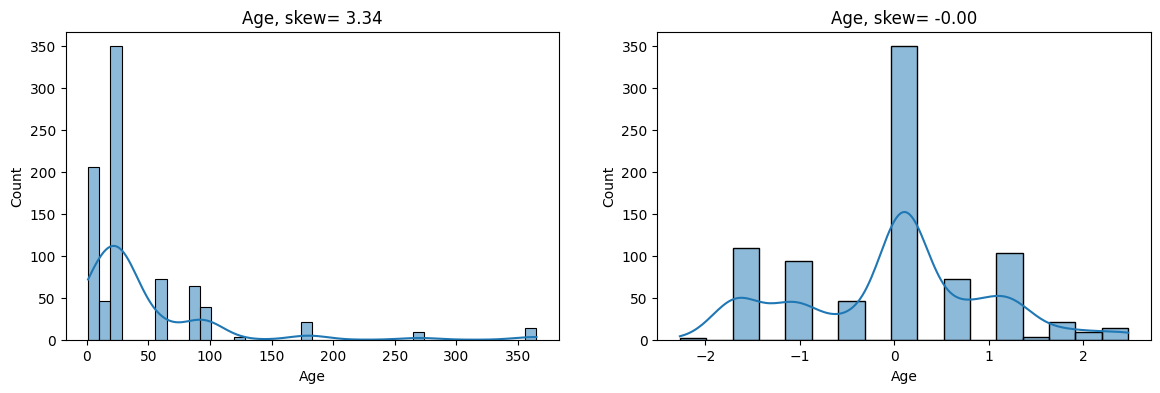

In [41]:
x_train_transform = pd.DataFrame(x_train_transform2, columns= x_train.columns)

for col in x_train_transform.columns: 
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(x_train[col], kde= True)
    plt.title(f"{col}, skew= {x_train[col].skew():.2f}")

    plt.subplot(122)
    sns.histplot(x_train_transform[col], kde= True)
    plt.title(f"{col}, skew= {x_train_transform[col].skew():.2f}")

    plt.show()